In [41]:
# もろもろインポート
% matplotlib inline
import pylab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

In [42]:
# 全体質問A1-A5, A10-A19
df = pd.read_csv("全体質問A1-A5, A10-A19読み込み.csv")

In [43]:
# 欠損値処理
# 999を全てNAにしたものをdf2とする
df_current = pd.read_csv("全体質問A1-A5, A10-A19読み込み.csv")
df2 = df_current.where(df_current != 999)

In [47]:
# 欠損値処理
# NAを全て削除したものをdf3とする
df3 = df2.dropna()
df3.index = range(1105)

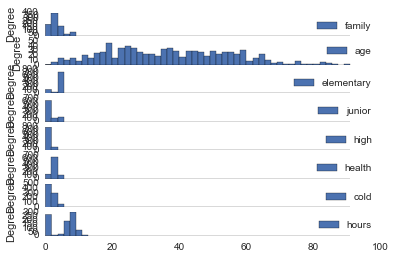

In [45]:
# 主要な外れ値可視化
# 目立つ奴はいない
plt.figure(figsize=(30, 16), dpi=80)
df3.ix[0:1105,[2,4,8,9,10,13,14,17]].plot(kind = "hist", bins = 50, subplots = True)
plt.show()

In [48]:
# 相関係数
df3.corr()

,house_num,id,family,gendar,age,household,married,ethnicity,elementary,junior,high,university,monestary,health,cold,chronic,together,hours
house_num,1.000000,-0.061032,-0.046758,0.040145,-0.015718,0.014777,-0.019799,0.059233,0.010917,0.053544,-0.022922,-0.022823,0.026958,-0.156645,-0.039147,0.037220,0.014667,-0.089450
id,-0.061032,1.000000,0.495138,0.031678,-0.601636,-0.491246,-0.559233,-0.003824,0.073512,0.176066,0.120951,0.110527,-0.024550,-0.067553,-0.082209,-0.170016,-0.081291,-0.184693
family,-0.046758,0.495138,1.000000,0.055213,-0.295291,-0.423958,-0.381235,0.050951,-0.029675,0.113990,0.120126,0.079203,0.054538,-0.069733,-0.084890,-0.083881,-0.051830,-0.166753
gendar,0.040145,0.031678,0.055213,1.000000,0.047406,-0.469343,-0.029903,-0.009303,-0.010287,-0.058218,-0.043443,0.013639,0.023464,-0.010777,-0.019662,0.069106,-0.026953,-0.097988
age,-0.015718,-0.601636,-0.295291,0.047406,1.000000,0.460805,0.610668,-0.007240,-0.144510,-0.224546,-0.151701,-0.099653,0.104167,0.101396,0.062484,0.245646,0.100502,0.137239
household,0.014777,-0.491246,-0.423958,-0.469343,0.460805,1.000000,0.430299,0.001530,-0.076397,-0.116692,-0.080106,-0.071950,-0.005057,0.076649,0.074691,0.097153,0.073966,0.166149
married,-0.019799,-0.559233,-0.381235,-0.029903,0.610668,0.430299,1.000000,0.013188,-0.071326,-0.164071,-0.108625,-0.119102,0.036900,0.082269,0.077726,0.152055,0.119936,0.250943
ethnicity,0.059233,-0.003824,0.050951,-0.009303,-0.007240,0.001530,0.013188,1.000000,-0.013113,0.018176,0.055906,-0.013405,-0.000530,-0.005430,0.012564,-0.014001,-0.044278,-0.057709
elementary,0.010917,0.073512,-0.029675,-0.010287,-0.144510,-0.076397,-0.071326,-0.013113,1.000000,0.375360,0.238339,0.149030,-0.095372,-0.078663,-0.020804,-0.104793,0.053507,0.114880
junior,0.053544,0.176066,0.113990,-0.058218,-0.224546,-0.116692,-0.164071,0.018176,0.375360,1.000000,0.697136,0.421905,-0.030441,-0.125482,-0.047637,-0.122553,-0.032552,-0.035717


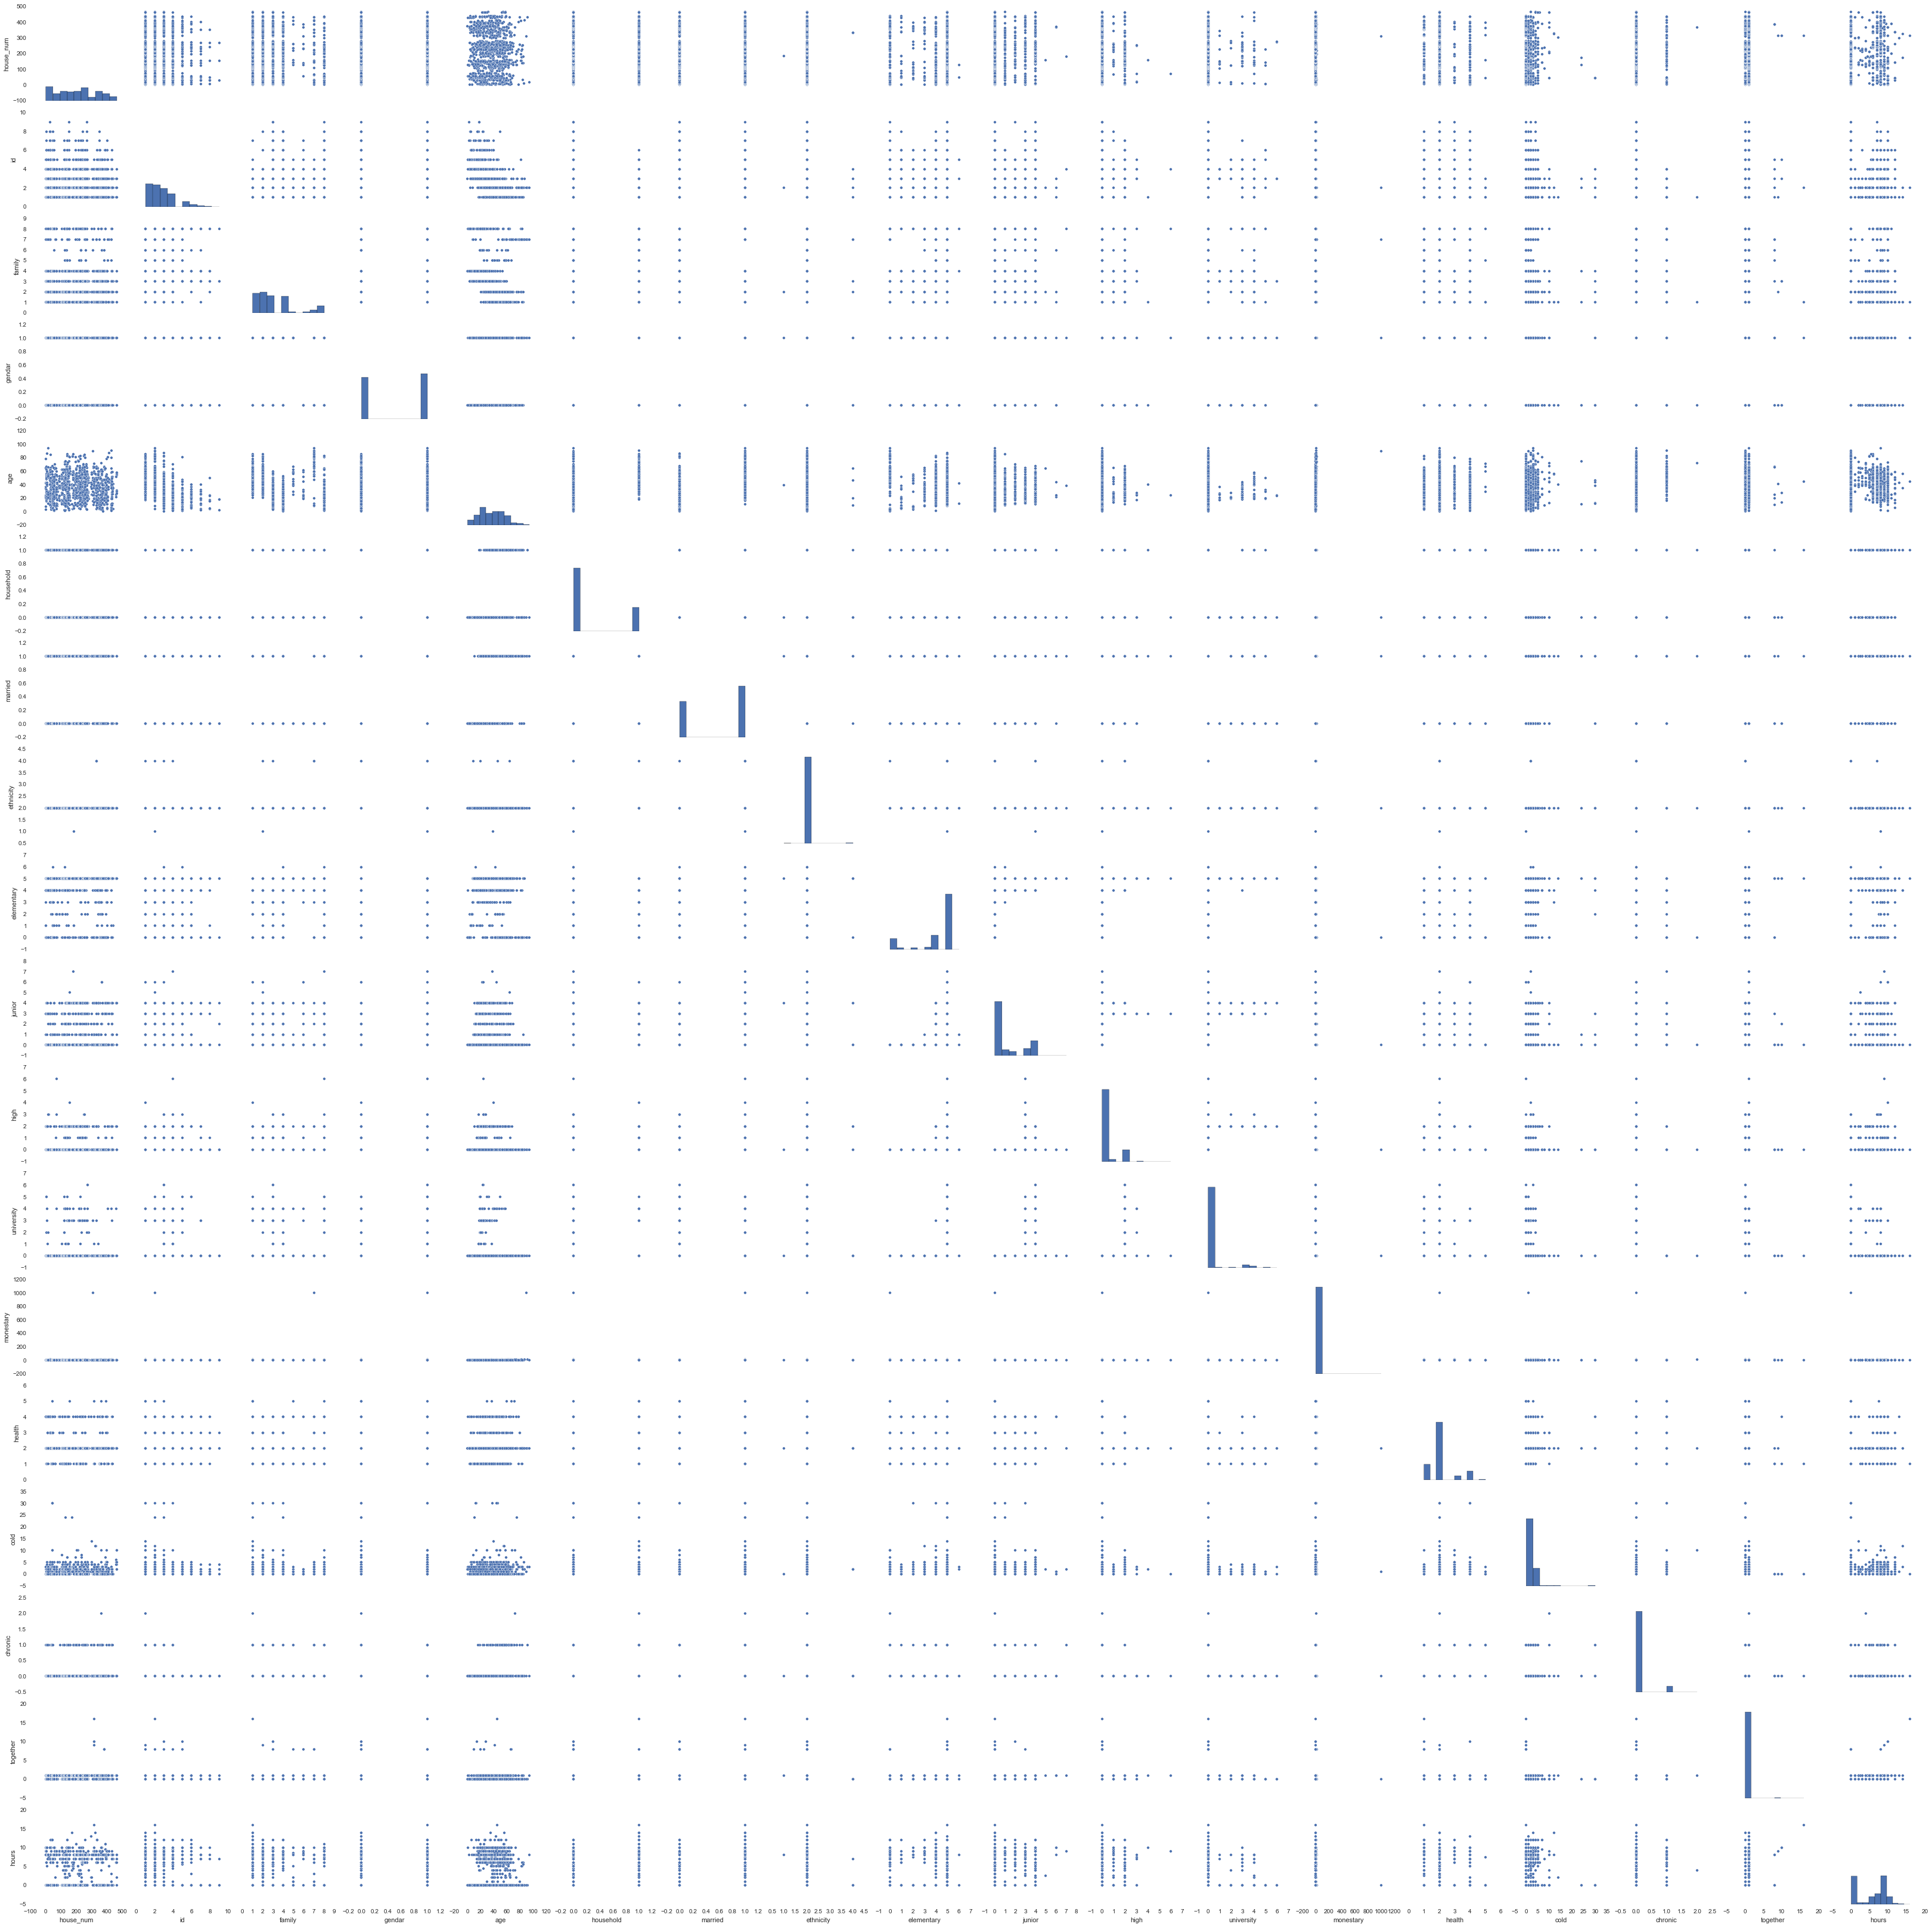

In [46]:
# 相関関係一覧
sns.pairplot(df3)